#*Titanic*

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import os

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded2 = files.upload()

Saving test.csv to test.csv


In [4]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded2['test.csv']))

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


Lets assaign some numbers to represent the different sex in both test and train.

ie:

**Female = 0**

**Male   = 1**


In [10]:
sex_bin = {"female": 0,
           "male": 1}
df['Sex'] = df['Sex'].map(sex_bin)
test['Sex'] = test['Sex'].map(sex_bin)

Let's draw some graph to check the ratio of survived to the ones who are not survived.

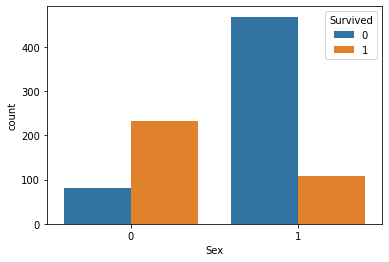

In [8]:
sns.countplot(x="Sex", hue="Survived", data=df)

**Detail on the Graph**:

Blue colour in the graph represents the male and the orange 

So to conclude from above plot:
* majority of male are NOT survived
* majority of female are survived
* male are greater than female

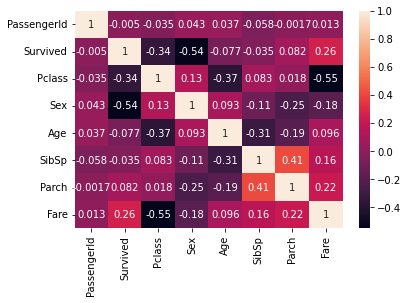

In [9]:
sns.heatmap(data=df.corr(), annot=True )

Let\`s observe **heatmap**
* Low correlations are between Survived and [Fare & Pclass]
* Zero correlations are between Survived and [Age, SibSp, PassengerId and Parch]
* Age & Pclass has normal negative correlation which means that Pclass maybe been devived into Age category
* Fare & Pclass also have normolized negative correlation which is probably means relationship
* Parch and SibSp have normal positive correlation value
* PassengerId does not have any high or low correlation with other feature -> so we drop PassenderId

**Those correlation results tell us that Zero correlation features should be eliminated.
However, Age i think must stay for modelling.**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          0 non-null      float64
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


**Age** has many missing values!

**Cabin** has only about 25% out of 100% values!

**Embarked** has double missing values!

My plan for replacing **Age** is to use mean() function for each title in **Name**

I will remove **Cabin** from dataframe because I find it  irrelevant

I will use  the most popular value instead of  missing values in **Embarked**


In [14]:
def get_title(name):
    first = name.split(',')
    second = first[1].split('.')
    return second[0]


In [15]:
df.Name = df.Name.apply(get_title)
test.Name = test.Name.apply(get_title)

We REPLACED NAME TO TITLE:
* 17 UNIQUE TITLES
* TITLES ARE HELPFUL FOR PREDICTING AGE 
* TITLE HELPS TO PREDICT OTHER MISSING VALUES
* NOW I AM ANALYSING TITLES AND OTHER FEATURES


In [16]:
def best_age(name):
    return df.loc[(df.Name == name)].Age.mean()

In [17]:
for i in df.Name.unique():
    if (df.loc[(df.Name == i)].Age.isnull().sum()) > 0:
        print(i, "&", df.loc[(df.Name == i)].Age.isnull().sum())
        print(best_age(i))

 Mr & 119
32.368090452261306
 Mrs & 17
35.898148148148145
 Miss & 36
21.773972602739725
 Master & 4
4.574166666666667
 Dr & 1
42.0


Here is values for missing values in **Age** column

In [18]:
df.Age=df.Age.fillna(df.Name.apply(best_age))
test.Age=test.Age.fillna(test.Name.apply(best_age))

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            891
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Age column has many missing values 
* Cabin column also has many missing values 
* Embarked column has 2 missing values
Now i should replace missing value to reallistic values:


In [20]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex            418
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In **test** dataframe, i have one missing value in **Fare** & 327 inn **Cabin**

In [21]:
y_train = df.Survived 
X_train = df.drop("Survived", axis=1) # remove Survived from dataframe


In [22]:
X_train = X_train.drop(["Ticket", "Cabin", "PassengerId"], axis=1) # removing other 3 figures from dataset

In [23]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [24]:
X_train.loc[(X_train.Embarked.isnull())]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,Miss,NaN,38.0,0,0,80.0,NaN
829,1,Mrs,NaN,62.0,0,0,80.0,NaN


*As you see, We have two missing value in Embarked for Miss and Mrs*

In [25]:
X_train.loc[(X_train.Name == " Miss") & (X_train.SibSp == 0) & (X_train.Parch== 0) & (X_train.Embarked == "S")].count()  # most popular -> "S" => X_train.Embarked == "S"  

Pclass      55
Name        55
Sex          0
Age         55
SibSp       55
Parch       55
Fare        55
Embarked    55
dtype: int64

In [26]:
X_train.loc[(X_train.Name == " Mrs") & (X_train.SibSp == 0) & (X_train.Parch== 0) & (X_train.Embarked == "S")]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
15,2,Mrs,NaN,55.000000,0,0,16.0000,S
66,2,Mrs,NaN,29.000000,0,0,10.5000,S
161,2,Mrs,NaN,40.000000,0,0,15.7500,S
190,2,Mrs,NaN,32.000000,0,0,13.0000,S
327,2,Mrs,NaN,36.000000,0,0,13.0000,S
399,2,Mrs,NaN,28.000000,0,0,12.6500,S
415,3,Mrs,NaN,35.898148,0,0,8.0500,S
483,3,Mrs,NaN,63.000000,0,0,9.5875,S
516,2,Mrs,NaN,34.000000,0,0,10.5000,S
706,2,Mrs,NaN,45.000000,0,0,13.5000,S


In [27]:
X_train.Embarked.fillna("S", inplace=True)

In [28]:
test.Fare.fillna(test.Fare.mean(), inplace=True) # fill missing values in test dataframe

In [29]:
features = ['Pclass', 'Sex', 'Age' ,'SibSp', 'Parch', 'Fare', 'Embarked']
X = pd.get_dummies(X_train[features], drop_first=True) #change categorical variables into dummy variables 

In [30]:
test_features = ['Pclass', 'Sex', 'Age' ,'SibSp', 'Parch', 'Fare', 'Embarked']
X_test = pd.get_dummies(test[test_features], drop_first=True)

In [31]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,NaN,22.0,1,0,7.2500,0,1
1,1,NaN,38.0,1,0,71.2833,0,0
2,3,NaN,26.0,0,0,7.9250,0,1
3,1,NaN,35.0,1,0,53.1000,0,1
4,3,NaN,35.0,0,0,8.0500,0,1


In [32]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,NaN,34.5,0,0,7.8292,1,0
1,3,NaN,47.0,1,0,7.0000,0,1
2,2,NaN,62.0,0,0,9.6875,1,0
3,3,NaN,27.0,0,0,8.6625,0,1
4,3,NaN,22.0,1,1,12.2875,0,1


In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         0 non-null      float64
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Embarked_Q  418 non-null    uint8  
 7   Embarked_S  418 non-null    uint8  
dtypes: float64(3), int64(3), uint8(2)
memory usage: 20.5 KB


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         0 non-null      float64
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
dtypes: float64(3), int64(3), uint8(2)
memory usage: 43.6 KB
